# Training EfficientDet for Early Fire Detection on FLAME Aerial Dataset

## Overview

For a deep dive on the EfficientDet model please see [the paper](https://arxiv.org/abs/1911.09070). For a shorter look, here is a great [blog post](https://towardsdatascience.com/efficientdet-scalable-and-efficient-object-detection-review-4472ffc34fd9)!

A PyTorch implementation of EfficientDet using the image detection library from Tessellate-Imaging for object detection. Our implementation uses the base version of EfficientDet-d0.  We train from the EfficientNet base backbone, without using a pretrained checkpoint for the detector.

## Setting up our envionment

In [ ]:
#! git clone https://github.com/roboflow-ai/Monk_Object_Detection.git

In [3]:
! cd /home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/pipeline/3_mxrcnn/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

xargs: warning: options --max-args and -L are mutually exclusive, ignoring previous --max-args value
  Cloning https://github.com/abhi-kumar/cocoapi.git to /tmp/pip-install-kbo5nmxr/pycocotools_5661d42f978446dba69821cb642cbcbf
  Running command git clone --filter=blob:none --quiet https://github.com/abhi-kumar/cocoapi.git /tmp/pip-install-kbo5nmxr/pycocotools_5661d42f978446dba69821cb642cbcbf
  Resolved https://github.com/abhi-kumar/cocoapi.git to commit 1d6d019f8938f47a9b5af28685011898b25ff93a
  Preparing metadata (setup.py) ... done
  Using cached Cython-3.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.2 kB)
Using cached Cython-3.0.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [60 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x

In [4]:
#fixed version of tqdm output for Colab
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip
#IGNORE restart runtime warning, it is indeed installed
#missing a few extra packages that we will need later!
!pip install efficientnet_pytorch
!pip install tensorboardX

     \ 91.8 kB 1.3 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tqdm: filename=tqdm-4.28.1-py2.py3-none-any.whl size=47875 sha256=93f1f7b15c0d3042c8c31ec17de3086624cbdcd30a200f4b53977192d15b25e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-nqg0h26x/wheels/dd/d1/3a/5f30b73f63af33d7020835aff7cec9fbded1a437e67fa0fd79
Successfully built tqdm
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 68.3 MB/s eta 0:00:0000:0100:01
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 63.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 68.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━

## Uploading data



In [8]:
%cd /home/calvinzhou/py-workspace/a2d2/EfficientDet-data/flame_annotated_v6i
#in the next three cells, we move the data into a structure that the image detection library will be expecting
#but no file data manipulation is necessary
#images can also be segmented into class folders, but we combine all classes here
!mkdir reformatted
!mkdir reformatted/Annotations
!mkdir reformatted/Images

In [ ]:
%cp train/_annotations.coco.json reformatted/Annotations/instances_Images.json

In [10]:
%cp train/*.jpg reformatted/Images/

## Training

In this section we set up the efficientDet-d0 model from backbone and train to our custom case

In [4]:
import os
import sys
sys.path.append("/home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/pipeline/lib/")

In [5]:
from train_detector import Detector

/home/calvinzhou/py-workspace/a2d2/EfficientDet-data/pipeline/lib/train_detector.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [6]:
gtf = Detector()

In [5]:
#directs the model towards file structure
root_dir = "/home/calvinzhou/py-workspace/a2d2/EfficientDet-data/flame_annotated_v6i"
coco_dir = "reformatted"
img_dir = "./"
set_dir = "Images"

In [6]:
#smells like some free compute from Colab, nice
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=8, image_size=640, use_gpu=True)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [7]:
gtf.Model()

Loaded pretrained weights for efficientnet-b0


In [8]:
gtf.Set_Hyperparams(lr=0.0001, val_interval=1, es_min_delta=0.0, es_patience=0)

In [10]:
%%time
gtf.Train(num_epochs=20, model_output_dir="trained/")

  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export


  0%|          | 0/60 [00:00<?, ?it/s]

faild onnx export
CPU times: user 7min 54s, sys: 18.1 s, total: 8min 13s
Wall time: 3min 11s


## Inference

In [7]:
import os
import sys
sys.path.append("/home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/pipeline/lib/")

In [8]:
from infer_detector import Infer

In [9]:
gtf = Infer()

In [10]:
#our trained model weights are in here in onxx format
gtf.Model(model_dir="trained/")

In [11]:
#extract class list from our annotations
import json
with open('/home/calvinzhou/py-workspace/a2d2/EfficientDet-data/flame_annotated_v6i/train/_annotations.coco.json') as json_file:
    data = json.load(json_file)
class_list = []
for category in data['categories']:
  class_list.append(category['name'])

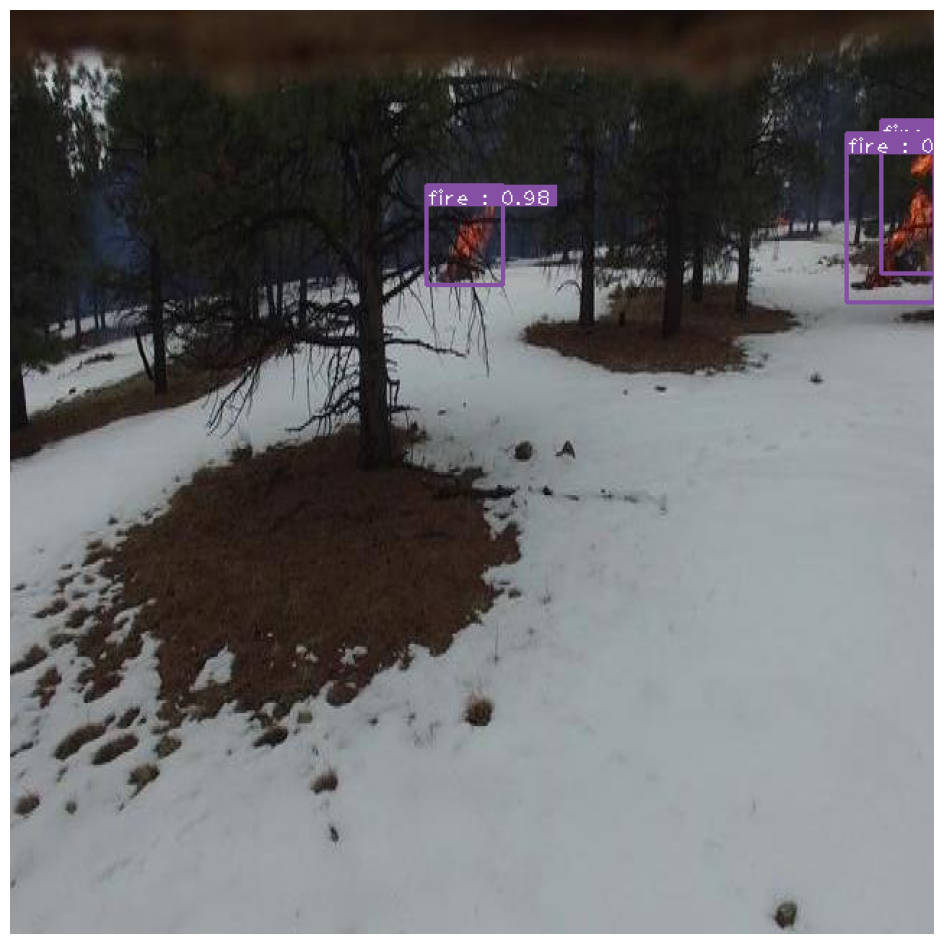

In [15]:
import matplotlib.pyplot as plt

test_images_dir = "/home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/EfficientDet-files/flame_annotated_v6i/test/"

# Get a list of test images
test_images = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg')]

# Choose the first image from the test set
img_path = os.path.join(test_images_dir, test_images[0])

# Perform prediction on the selected image
output_image, duration, scores, labels, boxes = gtf.Predict2(img_path, class_list, vis_threshold=0.5)

plt.figure(figsize=(12,12))
plt.imshow(output_image)
plt.axis('off')
plt.show()

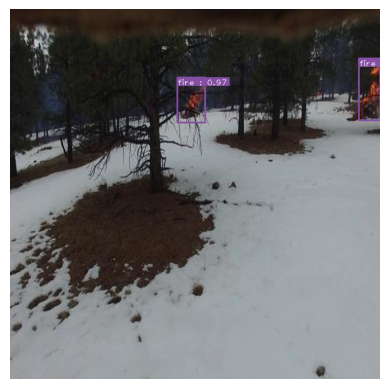

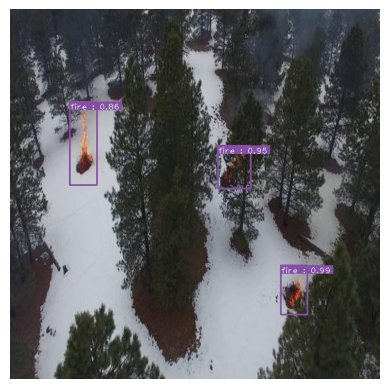

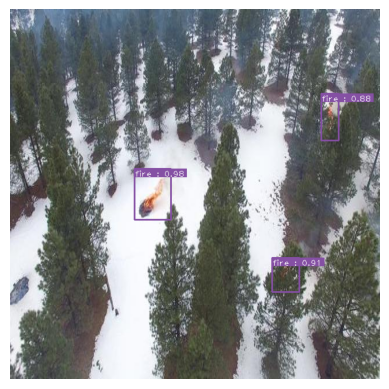

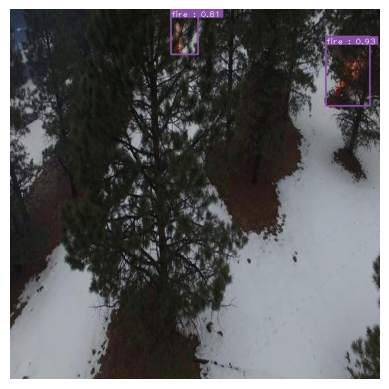

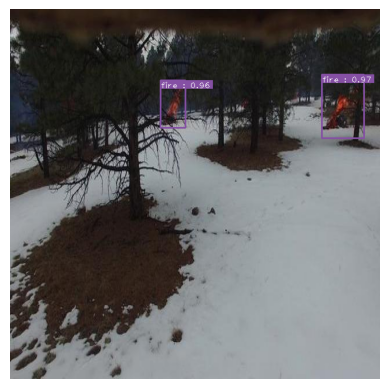

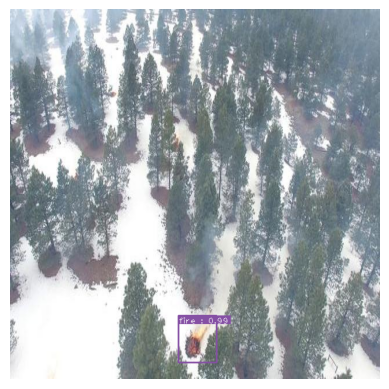

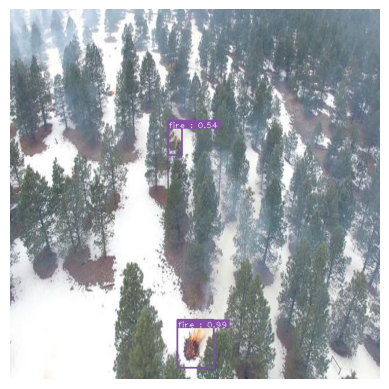

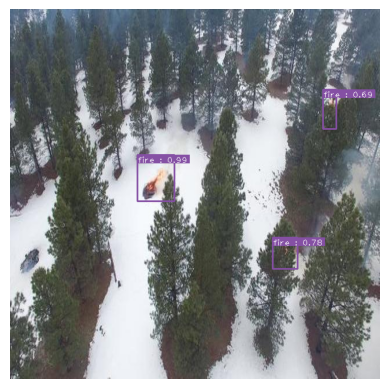

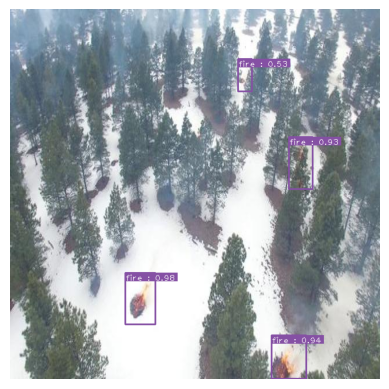

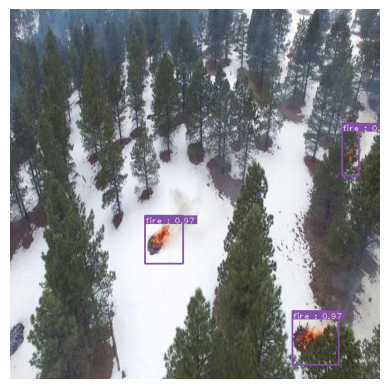

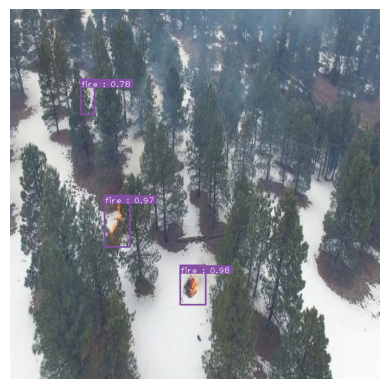

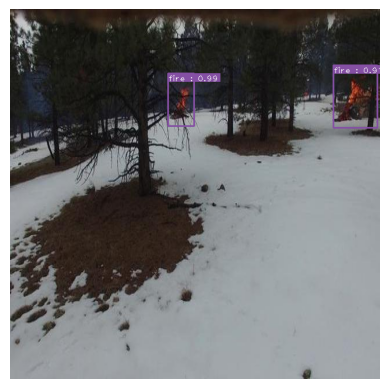

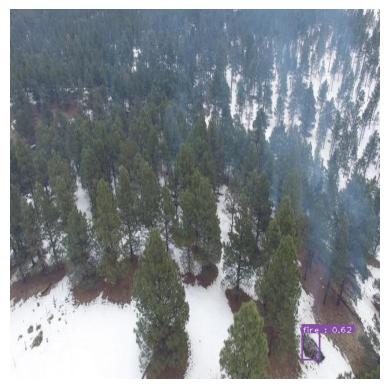

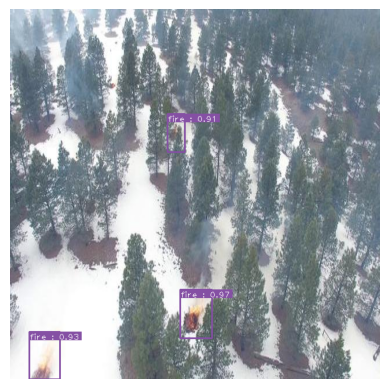

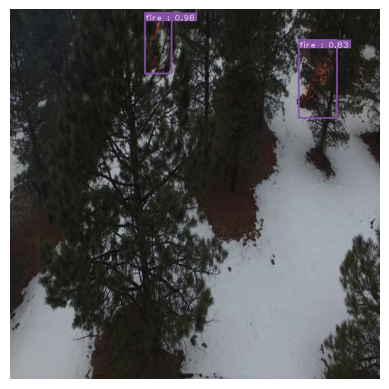

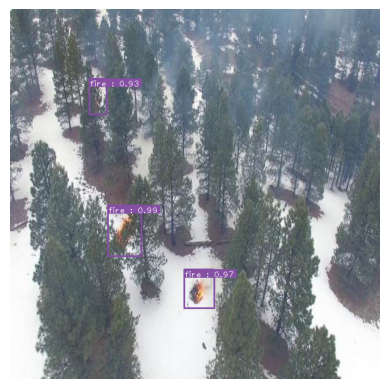

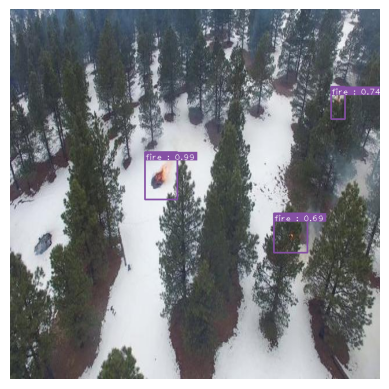

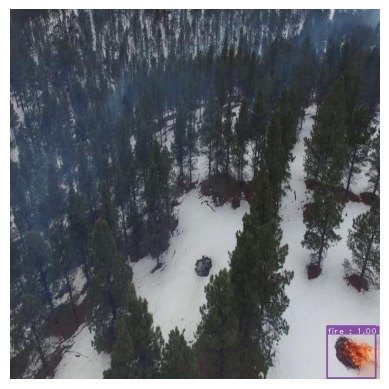

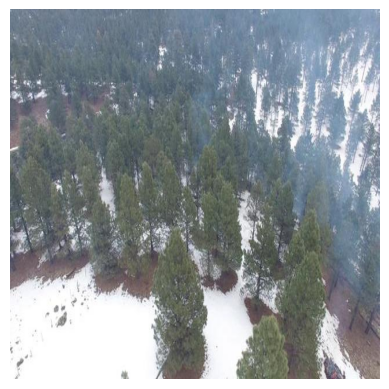

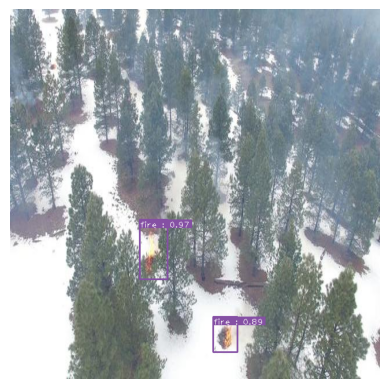

In [16]:
import os
import cv2
import matplotlib.pyplot as plt

VIS_THRESHOLD = 0.5

# Path to the test images directory
test_images_dir = "/home/calvinzhou/py-workspace/a2d2/EfficientDet-data/flame_annotated_v6i/test/"

# Get a list of test images
test_images = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg')]

def load_coco_json(json_path):
    with open(json_path, 'r') as f:
        coco_data = json.load(f)
    return coco_data

# Function to get ground truth boxes for an image
def get_ground_truth_boxes(coco_data, image_id):
    gt_boxes = [ann['bbox'] for ann in coco_data['annotations'] if ann['image_id'] == image_id]
    return gt_boxes

coco_json_path = "/home/calvinzhou/py-workspace/a2d2/EfficientDet-data/flame_annotated_v6i/test/_annotations.coco.json"
coco_data = load_coco_json(coco_json_path)

# Lists to store results for evaluation
all_gt_boxes = []
all_pred_boxes = []

# Loop through each test image
for img_filename in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_filename)

    # Get the image ID from the COCO JSON data
    image_id = next((img['id'] for img in coco_data['images'] if img['file_name'] == img_filename), None)

    # Skip if image ID is not found in the COCO JSON data
    if image_id is None:
        continue

    # Get ground truth boxes for the image
    gt_boxes = get_ground_truth_boxes(coco_data, image_id)

    # Perform object detection on the selected image
    output_image, duration, scores, labels, pred_boxes = gtf.Predict2(img_path, class_list, vis_threshold=VIS_THRESHOLD)

    # Append ground truth and predicted boxes for evaluation
    all_gt_boxes.append(gt_boxes)
    all_pred_boxes.append(pred_boxes)

    # Display the image using Matplotlib
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

## Evaluate on test dataset

In [1]:
import sys
sys.path.append("/home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/EfficientDet-files/pipeline/lib/")

In [2]:
from mAP_evaluation import evaluate

In [3]:
model_path = "/home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/trained/signatrix_efficientdet_coco.pth"
img_dir = "/home/calvinzhou/py-workspace/a2d2/Wildfire_Detection/EfficientDet/EfficientDet-files/flame_annotated_v6i/test/"
evaluate(model_path, img_dir)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.663
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.068
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.545
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.157
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.309
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets